In [2]:
import requests
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
sns.set_style('whitegrid')

In [4]:
url = 'https://fantasy.premierleague.com/api/bootstrap-static/'

In [5]:
r = requests.get(url)

In [6]:
json = r.json()

In [7]:
json.keys()

dict_keys(['chips', 'events', 'game_settings', 'game_config', 'phases', 'teams', 'total_players', 'element_stats', 'element_types', 'elements'])

In [8]:
elements_df = pd.DataFrame(json['elements'])
elements_types_df = pd.DataFrame(json['element_types'])
teams_df = pd.DataFrame(json['teams'])

In [9]:
elements_df

,can_transact,can_select,chance_of_playing_next_round,chance_of_playing_this_round,code,cost_change_event,cost_change_event_fall,cost_change_start,cost_change_start_fall,dreamteam_count,...,now_cost_rank_type,form_rank,form_rank_type,points_per_game_rank,points_per_game_rank_type,selected_rank,selected_rank_type,starts_per_90,clean_sheets_per_90,defensive_contribution_per_90
0,True,True,NaN,NaN,154561,0,0,0,0,1,...,3,74,8,43,4,15,2,1.00,0.6,0.00
1,True,True,NaN,NaN,109745,0,0,-1,1,0,...,33,514,74,527,75,227,31,0.00,0.0,0.00
2,True,False,0.0,0.0,463748,0,0,0,0,0,...,68,459,53,473,54,272,37,0.00,0.0,0.00
3,True,True,NaN,NaN,551221,0,0,0,0,0,...,82,490,67,504,68,343,52,0.00,0.0,0.00
4,True,True,NaN,NaN,226597,0,0,1,-1,0,...,3,49,20,56,26,17,6,1.00,0.6,7.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
736,True,True,NaN,NaN,230376,0,0,-2,2,0,...,141,252,121,307,151,309,103,1.02,0.0,9.66
737,True,True,NaN,NaN,497949,0,0,0,0,0,...,103,242,89,234,91,510,189,1.37,0.0,4.12
738,True,True,NaN,NaN,523705,0,0,0,0,0,...,106,271,94,339,127,665,225,0.82,0.0,5.32
739,True,True,NaN,NaN,431248,0,0,0,0,0,...,95,145,60,86,39,654,220,1.00,0.0,6.00


In [11]:
elements_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 741 entries, 0 to 740
Columns: 101 entries, can_transact to defensive_contribution_per_90
dtypes: bool(6), float64(15), int64(51), object(29)
memory usage: 554.4+ KB


In [12]:
slim_elements_df = elements_df[['first_name','second_name','team','element_type','selected_by_percent','now_cost','minutes','transfers_in','value_season','total_points', 'points_per_game', 'defensive_contribution_per_90']].copy()

In [13]:
slim_elements_df

,first_name,second_name,team,element_type,selected_by_percent,now_cost,minutes,transfers_in,value_season,total_points,points_per_game,defensive_contribution_per_90
0,David,Raya Martín,1,1,24.0,55,450,908296,4.7,26,5.2,0.00
1,Kepa,Arrizabalaga Revuelta,1,1,0.6,44,0,5410,0.0,0,0.0,0.00
2,Karl,Hein,1,1,0.4,40,0,5545,0.0,0,0.0,0.00
3,Tommy,Setford,1,1,0.2,40,0,11067,0.0,0,0.0,0.00
4,Gabriel,dos Santos Magalhães,1,2,22.4,61,450,913895,4.1,25,5.0,7.00
...,...,...,...,...,...,...,...,...,...,...,...,...
736,Jhon,Arias,20,3,0.3,53,177,5272,1.1,6,1.2,9.66
737,David,Møller Wolfe,20,2,0.1,45,131,2007,1.3,6,2.0,4.12
738,Jackson,Tchatchoua,20,2,0.0,45,220,1375,0.9,4,1.0,5.32
739,Ladislav,Krejcí,20,2,0.0,45,180,1784,1.8,8,4.0,6.00


In [14]:
slim_elements_df.loc[:,('position')] = slim_elements_df.element_type.map(elements_types_df.set_index('id').singular_name)

In [15]:
elements_types_df.head()

,id,plural_name,plural_name_short,singular_name,singular_name_short,squad_select,squad_min_select,squad_max_select,squad_min_play,squad_max_play,ui_shirt_specific,sub_positions_locked,element_count
0,1,Goalkeepers,GKP,Goalkeeper,GKP,2,None,None,1,1,True,[12],86
1,2,Defenders,DEF,Defender,DEF,5,None,None,3,5,False,[],245
2,3,Midfielders,MID,Midfielder,MID,5,None,None,2,5,False,[],328
3,4,Forwards,FWD,Forward,FWD,3,None,None,1,3,False,[],82


In [16]:
teams_df.head()

,code,draw,form,id,loss,name,played,points,position,short_name,...,team_division,unavailable,win,strength_overall_home,strength_overall_away,strength_attack_home,strength_attack_away,strength_defence_home,strength_defence_away,pulse_id
0,3,0,None,1,0,Arsenal,0,0,2,ARS,...,None,False,0,1320,1325,1350,1350,1290,1300,1
1,7,0,None,2,0,Aston Villa,0,0,18,AVL,...,None,False,0,1125,1250,1110,1200,1140,1300,2
2,90,0,None,3,0,Burnley,0,0,16,BUR,...,None,False,0,1050,1050,1050,1050,1050,1050,43
3,91,0,None,4,0,Bournemouth,0,0,4,BOU,...,None,False,0,1150,1180,1100,1160,1200,1200,127
4,94,0,None,5,0,Brentford,0,0,17,BRE,...,None,False,0,1120,1185,1080,1080,1160,1290,130


In [17]:
slim_elements_df.head()

,first_name,second_name,team,element_type,selected_by_percent,now_cost,minutes,transfers_in,value_season,total_points,points_per_game,defensive_contribution_per_90,position
0,David,Raya Martín,1,1,24.0,55,450,908296,4.7,26,5.2,0.0,Goalkeeper
1,Kepa,Arrizabalaga Revuelta,1,1,0.6,44,0,5410,0.0,0,0.0,0.0,Goalkeeper
2,Karl,Hein,1,1,0.4,40,0,5545,0.0,0,0.0,0.0,Goalkeeper
3,Tommy,Setford,1,1,0.2,40,0,11067,0.0,0,0.0,0.0,Goalkeeper
4,Gabriel,dos Santos Magalhães,1,2,22.4,61,450,913895,4.1,25,5.0,7.0,Defender


In [18]:
slim_elements_df.loc[:,('team_name')] = slim_elements_df.team.map(teams_df.set_index('id').name)

In [19]:
slim_elements_df.loc[:,('value')] = slim_elements_df.value_season.astype(float)

In [20]:
slim_elements_df.loc[:,('selected_by_percent')] = slim_elements_df.selected_by_percent.astype(float)

In [21]:
slim_elements_df.loc[:,('points_per_minute')] = slim_elements_df.total_points/slim_elements_df.minutes

In [22]:
slim_elements_df.sort_values('value',ascending=False).head(20)

,first_name,second_name,team,element_type,selected_by_percent,now_cost,minutes,transfers_in,value_season,total_points,points_per_game,defensive_contribution_per_90,position,team_name,value,points_per_minute
124,Marcos,Senesi Barón,4,2,12.2,47,450,1397301,7.9,37,7.4,13.20,Defender,Bournemouth,7.9,0.082222
279,Marc,Guéhi,8,2,24.2,47,450,1653472,7.7,36,7.2,7.20,Defender,Crystal Palace,7.7,0.080000
244,Trevoh,Chalobah,7,2,9.4,51,428,1025796,7.5,38,7.6,10.72,Defender,Chelsea,7.5,0.088785
517,Nick,Pope,15,1,6.2,50,450,373192,6.4,32,6.4,0.00,Goalkeeper,Newcastle,6.4,0.071111
626,Robin,Roefs,17,1,2.3,45,450,249143,6.4,29,5.8,0.00,Goalkeeper,Sunderland,6.4,0.064444
523,Dan,Burn,15,2,5.7,50,450,329239,6.4,32,6.4,9.00,Defender,Newcastle,6.4,0.071111
94,Jaidon,Anthony,3,3,2.1,55,442,241775,6.2,34,6.8,7.74,Midfielder,Burnley,6.2,0.076923
6,Riccardo,Calafiori,1,2,14.1,57,381,1441184,6.1,35,7.0,4.72,Defender,Arsenal,6.1,0.091864
524,Tino,Livramento,15,2,9.6,51,450,838550,6.1,31,6.2,3.00,Defender,Newcastle,6.1,0.068889
277,Tyrick,Mitchell,8,2,1.9,50,450,120384,6.0,30,6.0,7.60,Defender,Crystal Palace,6.0,0.066667


In [23]:
slim_elements_df.sort_values('points_per_game',ascending=False).head(20)

,first_name,second_name,team,element_type,selected_by_percent,now_cost,minutes,transfers_in,value_season,total_points,points_per_game,defensive_contribution_per_90,position,team_name,value,points_per_minute
472,Erling,Haaland,13,4,40.8,142,413,2123318,3.2,46,9.2,4.36,Forward,Man City,3.2,0.111380
251,Josh,Acheampong,7,2,1.5,40,90,262642,2.2,9,9.0,8.00,Defender,Chelsea,2.2,0.100000
134,Antoine,Semenyo,4,3,46.2,76,450,4704279,5.4,41,8.2,8.40,Midfielder,Bournemouth,5.4,0.091111
244,Trevoh,Chalobah,7,2,9.4,51,428,1025796,7.5,38,7.6,10.72,Defender,Chelsea,7.5,0.088785
124,Marcos,Senesi Barón,4,2,12.2,47,450,1397301,7.9,37,7.4,13.20,Defender,Bournemouth,7.9,0.082222
279,Marc,Guéhi,8,2,24.2,47,450,1653472,7.7,36,7.2,7.20,Defender,Crystal Palace,7.7,0.080000
6,Riccardo,Calafiori,1,2,14.1,57,381,1441184,6.1,35,7.0,4.72,Defender,Arsenal,6.1,0.091864
7,Jurriën,Timber,1,2,13.3,58,341,1300175,6.0,35,7.0,7.92,Defender,Arsenal,6.0,0.102639
266,João Pedro,Junqueira de Jesus,7,4,67.3,78,420,2360688,4.5,35,7.0,4.71,Forward,Chelsea,4.5,0.083333
430,Ryan,Gravenberch,12,3,1.9,55,360,199056,4.9,27,6.8,9.25,Midfielder,Liverpool,4.9,0.075000


In [25]:
slim_elements_df[slim_elements_df.minutes > 90].sort_values('points_per_minute',ascending=False).head(20)

,first_name,second_name,team,element_type,selected_by_percent,now_cost,minutes,transfers_in,value_season,total_points,points_per_game,defensive_contribution_per_90,position,team_name,value,points_per_minute
488,Harry,Maguire,14,2,0.6,44,110,18430,3.2,14,3.5,6.55,Defender,Man Utd,3.2,0.127273
591,Daniel,Ballard,17,2,2.7,46,151,587292,4.1,19,6.3,13.11,Defender,Sunderland,4.1,0.125828
181,Fábio,Freitas Gouveia Carvalho,5,3,0.3,49,95,20144,2.2,11,2.8,7.58,Midfielder,Brentford,2.2,0.115789
472,Erling,Haaland,13,4,40.8,142,413,2123318,3.2,46,9.2,4.36,Forward,Man City,3.2,0.111380
522,Sven,Botman,15,2,0.5,49,158,15892,3.5,17,5.7,10.25,Defender,Newcastle,3.5,0.107595
620,Wilson,Isidor,17,4,1.4,55,235,170387,4.5,25,5.0,3.83,Forward,Sunderland,4.5,0.106383
355,Emile,Smith Rowe,10,3,0.7,59,95,32452,1.7,10,2.0,2.84,Midfielder,Fulham,1.7,0.105263
218,Brajan,Gruda,6,3,0.1,54,126,9001,2.4,13,2.6,8.57,Midfielder,Brighton,2.4,0.103175
7,Jurriën,Timber,1,2,13.3,58,341,1300175,6.0,35,7.0,7.92,Defender,Arsenal,6.0,0.102639
47,Lamare,Bogarde,2,2,0.5,40,112,37116,2.8,11,2.8,5.62,Defender,Aston Villa,2.8,0.098214


In [27]:
slim_elements_df.sort_values('selected_by_percent',ascending=False).head(40)

,first_name,second_name,team,element_type,selected_by_percent,now_cost,minutes,transfers_in,value_season,total_points,points_per_game,defensive_contribution_per_90,position,team_name,value,points_per_minute
266,João Pedro,Junqueira de Jesus,7,4,67.3,78,420,2360688,4.5,35,7.0,4.71,Forward,Chelsea,4.5,0.083333
422,Mohamed,Salah,12,3,52.2,145,450,954688,2.1,30,6.0,4.20,Midfielder,Liverpool,2.1,0.066667
134,Antoine,Semenyo,4,3,46.2,76,450,4704279,5.4,41,8.2,8.40,Midfielder,Bournemouth,5.4,0.091111
472,Erling,Haaland,13,4,40.8,142,413,2123318,3.2,46,9.2,4.36,Forward,Man City,3.2,0.111380
114,Martin,Dúbravka,3,1,34.2,40,450,605495,4.2,17,3.4,0.00,Goalkeeper,Burnley,4.2,0.037778
643,Micky,van de Ven,18,2,33.1,47,439,1299720,6.0,28,5.6,5.54,Defender,Spurs,6.0,0.063781
650,Mohammed,Kudus,18,3,31.6,66,439,1707960,3.8,25,5.0,5.95,Midfielder,Spurs,3.8,0.056948
469,Tijjani,Reijnders,13,3,30.7,56,450,2182732,4.6,26,5.2,6.40,Midfielder,Man City,4.6,0.057778
414,Virgil,van Dijk,12,2,29.8,61,450,1038758,4.3,26,5.2,12.00,Defender,Liverpool,4.3,0.057778
439,Hugo,Ekitiké,12,4,28.0,87,365,2256973,3.7,32,6.4,5.67,Forward,Liverpool,3.7,0.087671


In [28]:
slim_elements_df.pivot_table(index='position',values='value',aggfunc=np.mean).reset_index()

/tmp/ipykernel_3389/1545140323.py:1: FutureWarning: The provided callable <function mean at 0x79f2fa317d80> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  slim_elements_df.pivot_table(index='position',values='value',aggfunc=np.mean).reset_index()


,position,value
0,Defender,1.444082
1,Forward,0.859756
2,Goalkeeper,0.867442
3,Midfielder,1.085671


In [29]:
slim_elements_df = slim_elements_df.loc[slim_elements_df.value > 0]

In [30]:
pivot = slim_elements_df.pivot_table(index='position',values='value',aggfunc=np.mean).reset_index()

/tmp/ipykernel_3389/310312042.py:1: FutureWarning: The provided callable <function mean at 0x79f2fa317d80> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  pivot = slim_elements_df.pivot_table(index='position',values='value',aggfunc=np.mean).reset_index()


In [31]:
pivot.sort_values('value',ascending=False)

,position,value
2,Goalkeeper,2.869231
0,Defender,2.527143
3,Midfielder,1.807614
1,Forward,1.532609


In [32]:
team_pivot = slim_elements_df.pivot_table(index='team_name',values='value',aggfunc=np.mean).reset_index()

/tmp/ipykernel_3389/2266262237.py:1: FutureWarning: The provided callable <function mean at 0x79f2fa317d80> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  team_pivot = slim_elements_df.pivot_table(index='team_name',values='value',aggfunc=np.mean).reset_index()


In [33]:
team_pivot.sort_values('value',ascending=False)

,team_name,value
16,Spurs,2.863158
7,Crystal Palace,2.652632
17,Sunderland,2.576190
2,Bournemouth,2.557143
14,Newcastle,2.428571
5,Burnley,2.410526
0,Arsenal,2.352381
8,Everton,2.321053
10,Leeds,2.319048
6,Chelsea,2.131818


In [34]:
fwd_df = slim_elements_df.loc[slim_elements_df.position == 'Forward']
mid_df = slim_elements_df.loc[slim_elements_df.position == 'Midfielder']
def_df = slim_elements_df.loc[slim_elements_df.position == 'Defender']
goal_df = slim_elements_df.loc[slim_elements_df.position == 'Goalkeeper']

In [35]:
mid_df.reset_index(drop=True, inplace=True)

<Axes: >

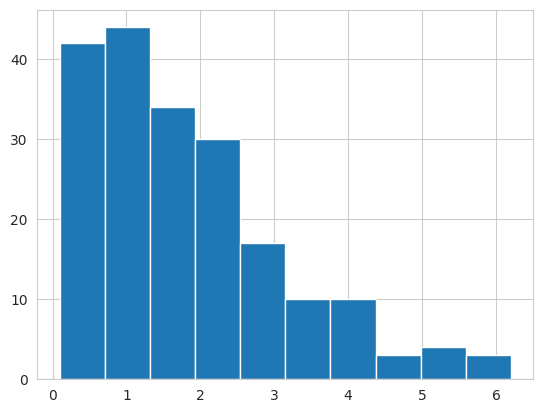

In [36]:
mid_df.value.hist()

In [37]:
goal_df.sort_values('value',ascending=False).head(10)

,first_name,second_name,team,element_type,selected_by_percent,now_cost,minutes,transfers_in,value_season,total_points,points_per_game,defensive_contribution_per_90,position,team_name,value,points_per_minute
517,Nick,Pope,15,1,6.2,50,450,373192,6.4,32,6.4,0.0,Goalkeeper,Newcastle,6.4,0.071111
626,Robin,Roefs,17,1,2.3,45,450,249143,6.4,29,5.8,0.0,Goalkeeper,Sunderland,6.4,0.064444
633,Guglielmo,Vicario,18,1,11.8,51,450,936015,5.9,30,6.0,0.0,Goalkeeper,Spurs,5.9,0.066667
0,David,Raya Martín,1,1,24.0,55,450,908296,4.7,26,5.2,0.0,Goalkeeper,Arsenal,4.7,0.057778
119,Đorđe,Petrović,4,1,4.8,45,450,334378,4.7,21,4.2,0.0,Goalkeeper,Bournemouth,4.7,0.046667
310,Jordan,Pickford,9,1,11.4,55,450,313924,4.5,25,5.0,0.0,Goalkeeper,Everton,4.5,0.055556
272,Dean,Henderson,8,1,8.0,50,450,280456,4.4,22,4.4,0.0,Goalkeeper,Crystal Palace,4.4,0.048889
114,Martin,Dúbravka,3,1,34.2,40,450,605495,4.2,17,3.4,0.0,Goalkeeper,Burnley,4.2,0.037778
344,Bernd,Leno,10,1,1.6,50,450,43048,3.4,17,3.4,0.0,Goalkeeper,Fulham,3.4,0.037778
407,Alisson,Becker,12,1,10.8,55,450,238935,3.3,18,3.6,0.0,Goalkeeper,Liverpool,3.3,0.040000


<Axes: >

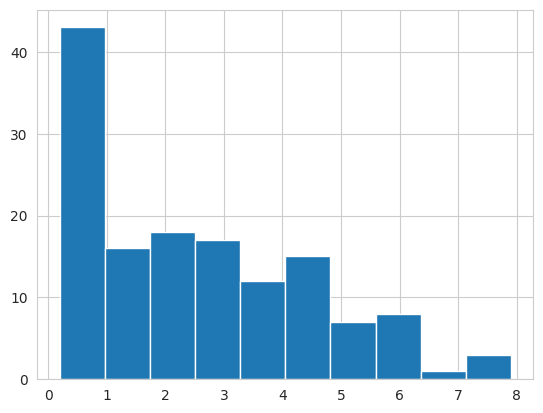

In [38]:
def_df.value.hist()

In [39]:
def_df.sort_values('value',ascending=False).head(20)

,first_name,second_name,team,element_type,selected_by_percent,now_cost,minutes,transfers_in,value_season,total_points,points_per_game,defensive_contribution_per_90,position,team_name,value,points_per_minute
124,Marcos,Senesi Barón,4,2,12.2,47,450,1397301,7.9,37,7.4,13.20,Defender,Bournemouth,7.9,0.082222
279,Marc,Guéhi,8,2,24.2,47,450,1653472,7.7,36,7.2,7.20,Defender,Crystal Palace,7.7,0.080000
244,Trevoh,Chalobah,7,2,9.4,51,428,1025796,7.5,38,7.6,10.72,Defender,Chelsea,7.5,0.088785
523,Dan,Burn,15,2,5.7,50,450,329239,6.4,32,6.4,9.00,Defender,Newcastle,6.4,0.071111
6,Riccardo,Calafiori,1,2,14.1,57,381,1441184,6.1,35,7.0,4.72,Defender,Arsenal,6.1,0.091864
524,Tino,Livramento,15,2,9.6,51,450,838550,6.1,31,6.2,3.00,Defender,Newcastle,6.1,0.068889
643,Micky,van de Ven,18,2,33.1,47,439,1299720,6.0,28,5.6,5.54,Defender,Spurs,6.0,0.063781
277,Tyrick,Mitchell,8,2,1.9,50,450,120384,6.0,30,6.0,7.60,Defender,Crystal Palace,6.0,0.066667
7,Jurriën,Timber,1,2,13.3,58,341,1300175,6.0,35,7.0,7.92,Defender,Arsenal,6.0,0.102639
276,Maxence,Lacroix,8,2,4.3,51,450,457254,5.9,30,6.0,9.80,Defender,Crystal Palace,5.9,0.066667


In [40]:
mid_df.sort_values('value',ascending=False).head(20)

,first_name,second_name,team,element_type,selected_by_percent,now_cost,minutes,transfers_in,value_season,total_points,points_per_game,defensive_contribution_per_90,position,team_name,value,points_per_minute
22,Jaidon,Anthony,3,3,2.1,55,442,241775,6.2,34,6.8,7.74,Midfielder,Burnley,6.2,0.076923
69,Moisés,Caicedo Corozo,7,3,10.5,56,450,744990,5.9,33,6.6,14.80,Midfielder,Chelsea,5.9,0.073333
110,Anton,Stach,11,3,0.9,50,450,96927,5.8,29,5.8,8.60,Midfielder,Leeds,5.8,0.064444
24,Josh,Cullen,3,3,2.1,50,422,282308,5.4,27,5.4,11.52,Midfielder,Burnley,5.4,0.063981
32,Antoine,Semenyo,4,3,46.2,76,450,4704279,5.4,41,8.2,8.40,Midfielder,Bournemouth,5.4,0.091111
8,Martín,Zubimendi Ibáñez,1,3,3.9,54,450,339978,5.0,27,5.4,6.80,Midfielder,Arsenal,5.0,0.060000
86,James,Garner,9,3,0.6,50,450,70135,5.0,25,5.0,12.80,Midfielder,Everton,5.0,0.055556
119,Ryan,Gravenberch,12,3,1.9,55,360,199056,4.9,27,6.8,9.25,Midfielder,Liverpool,4.9,0.075000
131,Tijjani,Reijnders,13,3,30.7,56,450,2182732,4.6,26,5.2,6.40,Midfielder,Man City,4.6,0.057778
66,Enzo,Fernández,7,3,13.3,67,438,1336115,4.5,30,6.0,5.75,Midfielder,Chelsea,4.5,0.068493


In [41]:
fwd_df.sort_values('value',ascending=False).head(20)

,first_name,second_name,team,element_type,selected_by_percent,now_cost,minutes,transfers_in,value_season,total_points,points_per_game,defensive_contribution_per_90,position,team_name,value,points_per_minute
266,João Pedro,Junqueira de Jesus,7,4,67.3,78,420,2360688,4.5,35,7.0,4.71,Forward,Chelsea,4.5,0.083333
620,Wilson,Isidor,17,4,1.4,55,235,170387,4.5,25,5.0,3.83,Forward,Sunderland,4.5,0.106383
665,Richarlison,de Andrade,18,4,13.8,67,347,1663459,4.3,29,5.8,5.19,Forward,Spurs,4.3,0.083573
439,Hugo,Ekitiké,12,4,28.0,87,365,2256973,3.7,32,6.4,5.67,Forward,Liverpool,3.7,0.087671
111,Lyle,Foster,3,4,1.7,50,418,199229,3.6,18,3.6,6.03,Forward,Burnley,3.6,0.043062
472,Erling,Haaland,13,4,40.8,142,413,2123318,3.2,46,9.2,4.36,Forward,Man City,3.2,0.111380
696,Jarrod,Bowen,19,4,6.4,77,450,118611,3.1,24,4.8,5.80,Forward,West Ham,3.1,0.053333
193,Igor Thiago,Nascimento Rodrigues,5,4,1.8,60,405,197486,2.8,17,3.4,5.11,Forward,Brentford,2.8,0.041975
368,Rodrigo,Muniz Carvalho,10,4,2.5,55,314,212318,2.7,15,3.0,4.87,Forward,Fulham,2.7,0.047771
576,Chris,Wood,16,4,20.5,76,370,2017486,2.6,20,4.0,1.95,Forward,Nott'm Forest,2.6,0.054054


Text(0, 0.5, 'Value (Points/Cost)')

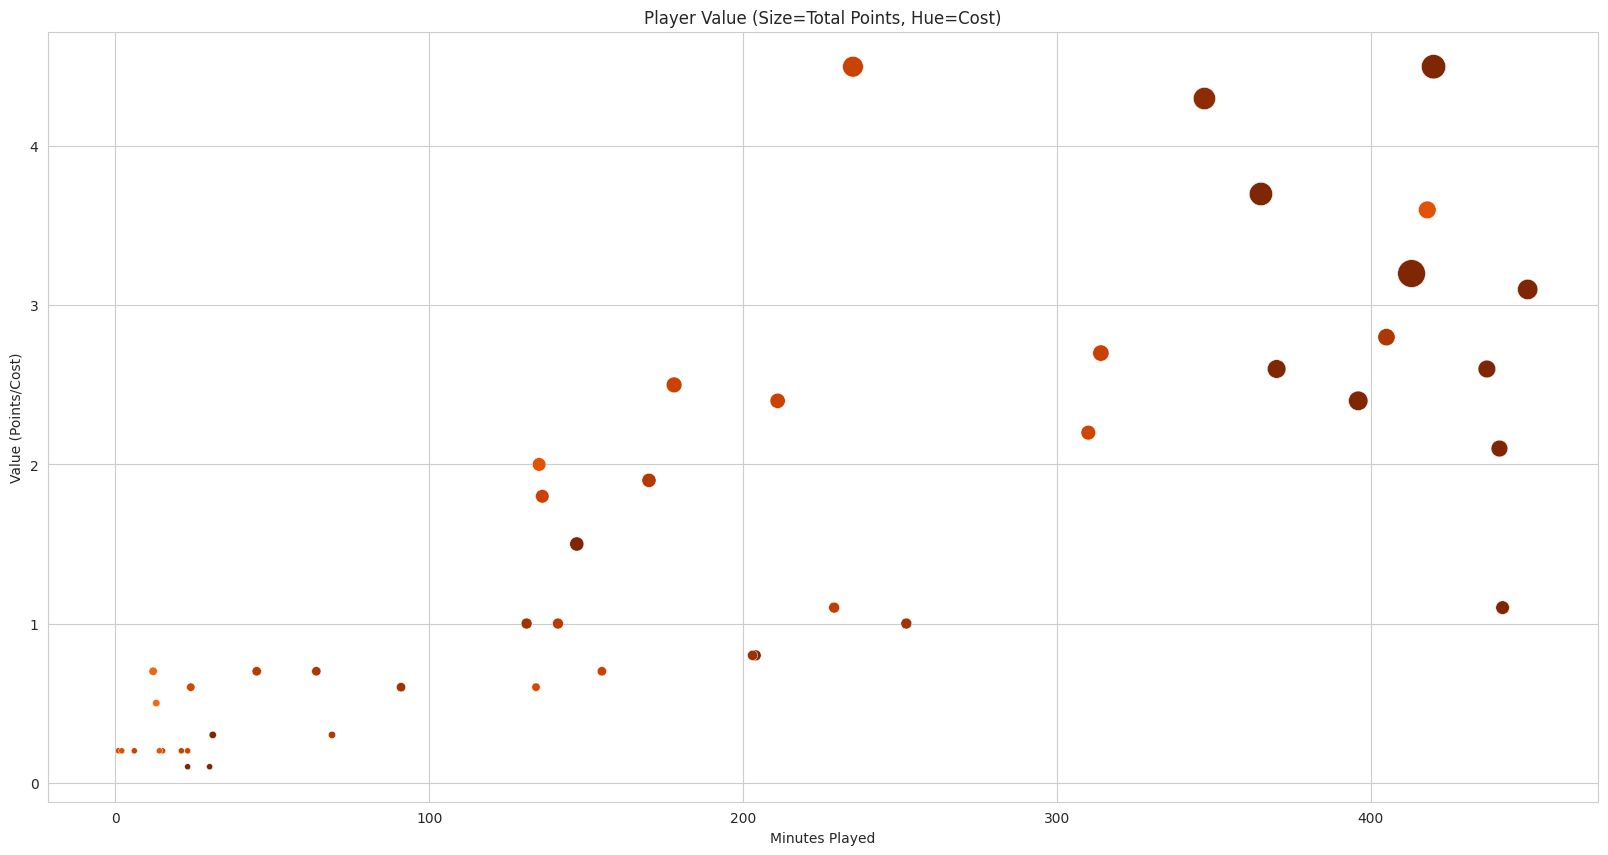

In [42]:
plt.figure(figsize=(20, 10))
sns.scatterplot(data=fwd_df, x="minutes", y="value", hue="now_cost", size="total_points", palette='Oranges', legend=False, sizes=(20, 400), hue_norm=(0, 70))
plt.title('Player Value (Size=Total Points, Hue=Cost)')
# Set x-axis label
plt.xlabel('Minutes Played')
# Set y-axis label
plt.ylabel('Value (Points/Cost)')

Text(0, 0.5, 'Value (Points/Cost)')

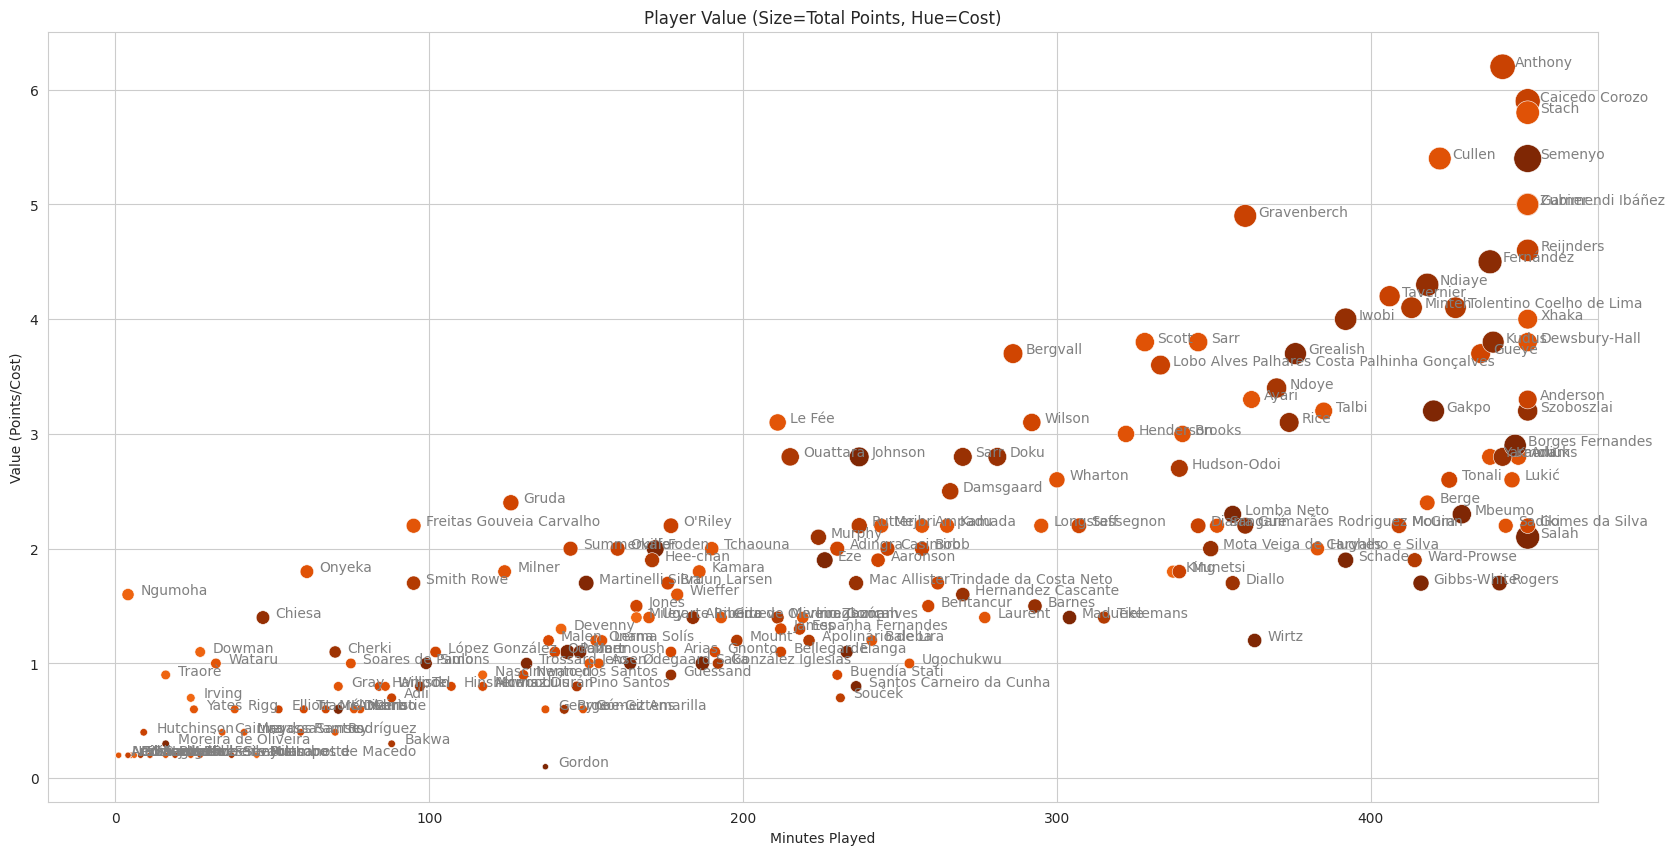

In [43]:
plt.figure(figsize=(20,10))
p1 = sns.scatterplot(data=mid_df, x="minutes", y="value", hue="now_cost", size="total_points", palette='Oranges', legend=False, sizes=(20, 400), hue_norm=(0, 70))

for line in range(0,mid_df.shape[0]):
     p1.text(mid_df.minutes[line]+4, mid_df.value[line], mid_df.second_name[line], horizontalalignment='left', size='medium', color='grey', weight='light')

plt.title('Player Value (Size=Total Points, Hue=Cost)')
# Set x-axis label
plt.xlabel('Minutes Played')
# Set y-axis label
plt.ylabel('Value (Points/Cost)')

In [44]:
mid_df.sort_values('value',ascending=False).head(20)

,first_name,second_name,team,element_type,selected_by_percent,now_cost,minutes,transfers_in,value_season,total_points,points_per_game,defensive_contribution_per_90,position,team_name,value,points_per_minute
22,Jaidon,Anthony,3,3,2.1,55,442,241775,6.2,34,6.8,7.74,Midfielder,Burnley,6.2,0.076923
69,Moisés,Caicedo Corozo,7,3,10.5,56,450,744990,5.9,33,6.6,14.80,Midfielder,Chelsea,5.9,0.073333
110,Anton,Stach,11,3,0.9,50,450,96927,5.8,29,5.8,8.60,Midfielder,Leeds,5.8,0.064444
24,Josh,Cullen,3,3,2.1,50,422,282308,5.4,27,5.4,11.52,Midfielder,Burnley,5.4,0.063981
32,Antoine,Semenyo,4,3,46.2,76,450,4704279,5.4,41,8.2,8.40,Midfielder,Bournemouth,5.4,0.091111
8,Martín,Zubimendi Ibáñez,1,3,3.9,54,450,339978,5.0,27,5.4,6.80,Midfielder,Arsenal,5.0,0.060000
86,James,Garner,9,3,0.6,50,450,70135,5.0,25,5.0,12.80,Midfielder,Everton,5.0,0.055556
119,Ryan,Gravenberch,12,3,1.9,55,360,199056,4.9,27,6.8,9.25,Midfielder,Liverpool,4.9,0.075000
131,Tijjani,Reijnders,13,3,30.7,56,450,2182732,4.6,26,5.2,6.40,Midfielder,Man City,4.6,0.057778
66,Enzo,Fernández,7,3,13.3,67,438,1336115,4.5,30,6.0,5.75,Midfielder,Chelsea,4.5,0.068493


In [45]:
mid_df.minutes.loc[0:174]

0      187
1      164
2      304
3      150
4      131
      ... 
170    237
171    439
172     97
173    259
174    286
Name: minutes, Length: 175, dtype: int64

In [46]:
line

196

Text(0, 0.5, 'Value (Points/Cost)')

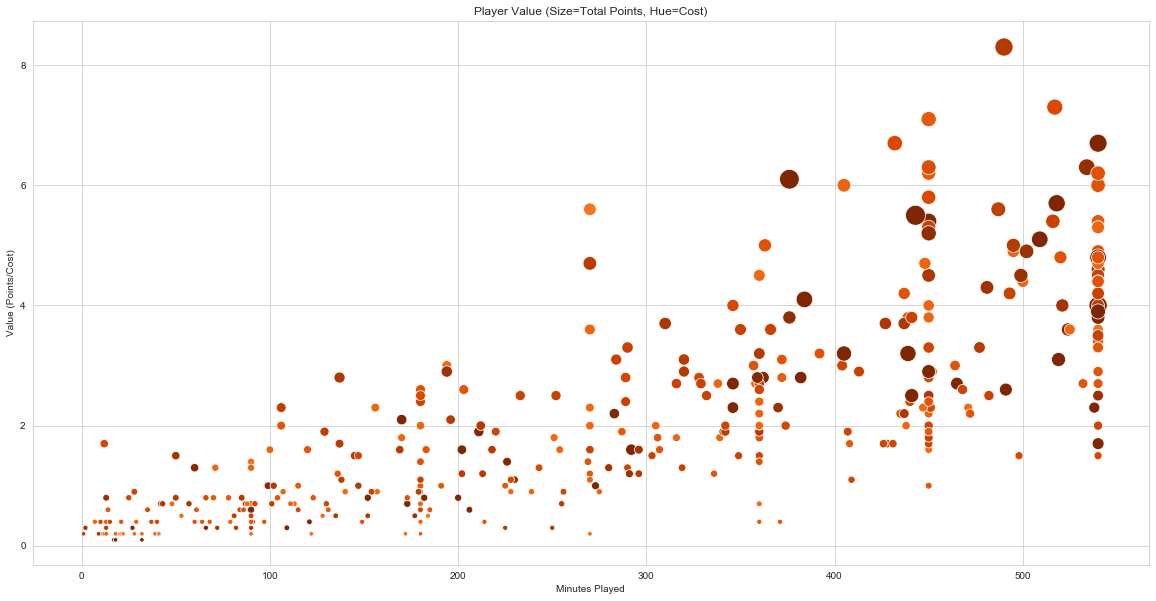

In [43]:
plt.figure(figsize=(20, 10))
sns.scatterplot(data=slim_elements_df, x="minutes", y="value", hue="now_cost", size="total_points", palette='Oranges', legend=False, sizes=(20, 400), hue_norm=(0, 70))
plt.title('Player Value (Size=Total Points, Hue=Cost)')
# Set x-axis label
plt.xlabel('Minutes Played')
# Set y-axis label
plt.ylabel('Value (Points/Cost)')

In [47]:
teams_df

,code,draw,form,id,loss,name,played,points,position,short_name,...,team_division,unavailable,win,strength_overall_home,strength_overall_away,strength_attack_home,strength_attack_away,strength_defence_home,strength_defence_away,pulse_id
0,3,0,None,1,0,Arsenal,0,0,2,ARS,...,None,False,0,1320,1325,1350,1350,1290,1300,1
1,7,0,None,2,0,Aston Villa,0,0,18,AVL,...,None,False,0,1125,1250,1110,1200,1140,1300,2
2,90,0,None,3,0,Burnley,0,0,16,BUR,...,None,False,0,1050,1050,1050,1050,1050,1050,43
3,91,0,None,4,0,Bournemouth,0,0,4,BOU,...,None,False,0,1150,1180,1100,1160,1200,1200,127
4,94,0,None,5,0,Brentford,0,0,17,BRE,...,None,False,0,1120,1185,1080,1080,1160,1290,130
5,36,0,None,6,0,Brighton,0,0,14,BHA,...,None,False,0,1150,1175,1090,1140,1210,1210,131
6,8,0,None,7,0,Chelsea,0,0,6,CHE,...,None,False,0,1185,1245,1150,1190,1220,1300,4
7,31,0,None,8,0,Crystal Palace,0,0,5,CRY,...,None,False,0,1140,1160,1120,1130,1160,1190,6
8,11,0,None,9,0,Everton,0,0,10,EVE,...,None,False,0,1100,1115,1140,1140,1060,1090,7
9,54,0,None,10,0,Fulham,0,0,8,FUL,...,None,False,0,1125,1125,1130,1130,1120,1120,34


In [48]:
import altair as alt

In [49]:
alt.Chart(slim_elements_df).mark_circle(size=60).encode(
    x='minutes',
    y='value',
    color='now_cost',
    tooltip=['second_name', 'team_name', 'now_cost', 'total_points', 'points_per_game']
).interactive()

alt.Chart(...)